# **Causal inference with observational data**
## Interrupted time series without control single-group pre/post design
* Have repeated overvations of the outcome over time? (시계열인가?)
 * yes
* **Have a control time series data from a non-treated unit? (대조군이 있는가?)**
 * **no**  
 
$\rightarrow$ 시계열 접근 방법  
$\rightarrow$ Interrupted Time Series analysis 에서 **대조군이 없는 경우** 

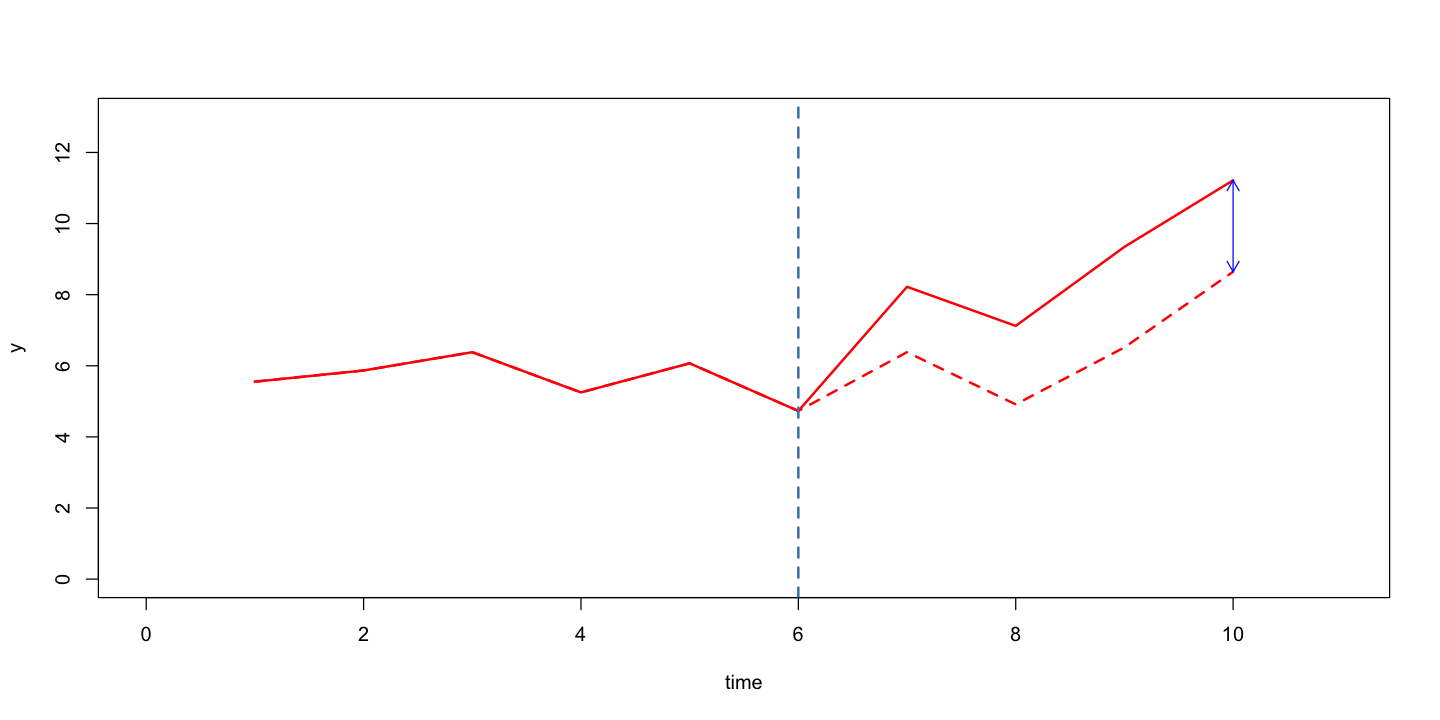

In [57]:
y1<-seq(0,0.5,by=.1)+rnorm(6,0.05)
y2<-c(1,1.5,2,2.5)+rnorm(4,0.05)
y3<-c(2,3.5,5,6.5)+rnorm(4,0.05)
options(repr.plot.width=12, repr.plot.height=6)
plot(c(y1,y2)+3,type='n',ylim=c(0,13),xlim=c(0,11),ylab='y',xlab='time',lwd=2)
lines(c(y1,y3)+5,col='red',lwd=2)
lines(c(y1,y2)+5,col='red',lwd=2,lty=2)
abline(v=6,col='steelblue',lwd=2,lty=2)
arrows(10,y2[4]+5,10,y3[4]+5,code=3,length=0.1,col='blue')

### Bayesian structural time-series models
#### Structural time-series models
##### state-space model

$$y_t=Z^T\alpha_t+\varepsilon_t, \tag{1} \label{eq:obs}$$

$$\alpha_{t+1}=T_t\alpha_t+R_t\eta_t,\tag{2} \label{eq:state}$$

where $\varepsilon_t \sim N(0,\sigma^2_t)$ and $\eta_t \sim n(0,Q_t)$ are independent of all other unknowns. equation \eqref{eq:obs} is the *observation equation*; equation \eqref{eq:state} is the *state equation*;

* local linear trend
* seasonality

\begin{align}
y_t &=\mu_t + \tau_t+\beta^T\boldsymbol x_t+\epsilon_t \\
\mu_t&=\mu_{t-1}+\delta_{t-1}+u_t \\
\delta_t&=\delta_{t-1}+v_t\\
\tau_t&=-\sum_{s=1}^{S-1}\tau_{t-s}+w_t \tag{3} \label{eq:bs} \\
\end{align}


The parameters in equation \eqref{eq:bs} are the variances $\sigma^2_\epsilon,\sigma^2_u,\sigma^2_v,\sigma^2_w$ and the regression coefficients $\beta$.

##### **Bayesian approch**
* spike-and-slab : shrinkage method = variable selection
* Gibbs sampler $\rightarrow$ stationary distribution

# Application
* example(CausalImpact package)

y,x1
105.2950,88.21513
105.8943,88.48415
106.6209,87.87684
106.1572,86.77954
101.2812,84.62243
101.4484,84.60650


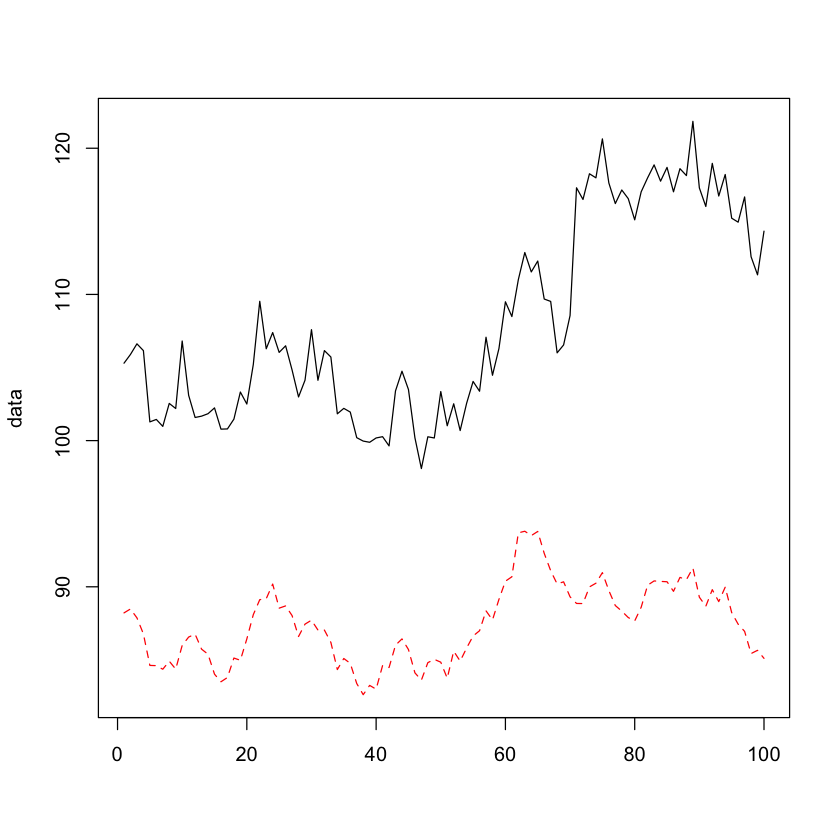

Posterior inference {CausalImpact}

                         Average        Cumulative  
Actual                   117            3511        
Prediction (s.d.)        107 (0.35)     3196 (10.38)
95% CI                   [106, 107]     [3176, 3217]
                                                    
Absolute effect (s.d.)   11 (0.35)      316 (10.38) 
95% CI                   [9.8, 11]      [294.4, 336]
                                                    
Relative effect (s.d.)   9.9% (0.32%)   9.9% (0.32%)
95% CI                   [9.2%, 11%]    [9.2%, 11%] 

Posterior tail-area probability p:   0.00101
Posterior prob. of a causal effect:  99.8994%

For more details, type: summary(impact, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 117.05. By contrast, in the absence of an intervention, we would have expected an average response of 106.53. The 95% interval of this counterfactual prediction is [1

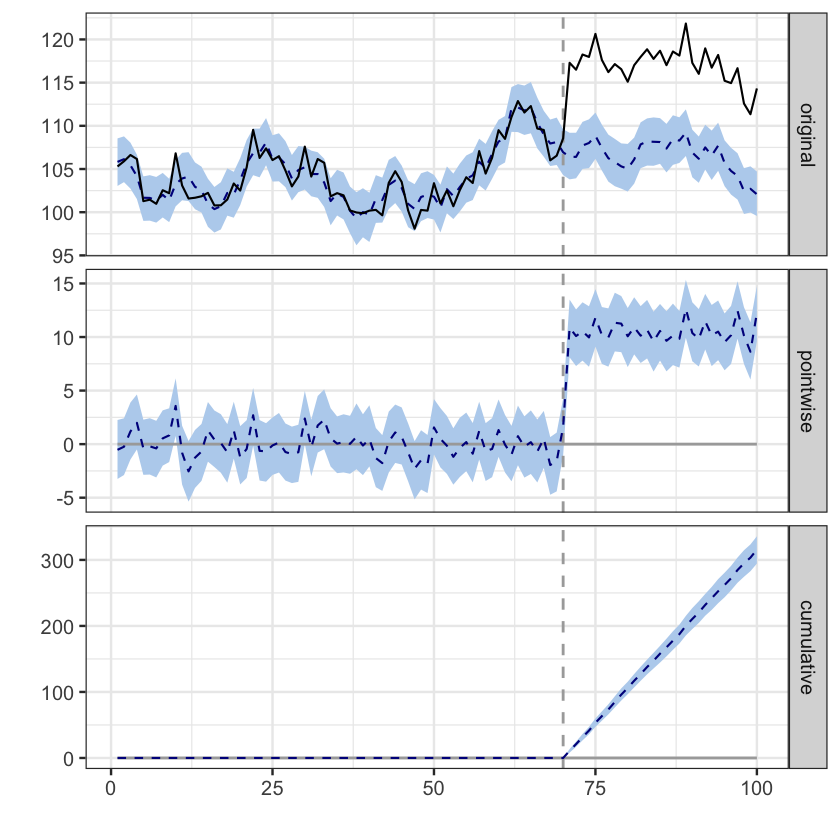

In [11]:
#install.packages("CausalImpact",dependencies=TRUE)
library(tidyverse)
library(lubridate)
library(CausalImpact)
set.seed(1)
x1 <- 100 + arima.sim(model = list(ar = 0.999), n = 100)
y <- 1.2 * x1 + rnorm(100)
y[71:100] <- y[71:100] + 10



data <- cbind(y, x1)

head(data)
matplot(data, type = "l")

pre.period <- c(1, 70)
post.period <- c(71, 100)

impact <- CausalImpact(data, pre.period, post.period)
plot(impact)


#post.period <- c(71, 100)
#post.period.response <- y[post.period[1] : post.period[2]]
#y[post.period[1] : post.period[2]] <- NA
#ss <- AddLocalLevel(list(), y)
#bsts.model <- bsts(y ~ x1, ss, niter = 1000)
#impact <- CausalImpact(bsts.model = bsts.model,
       #                post.period.response = post.period.response)

summary(impact)
summary(impact, "report")

In [45]:
mean(impact$series[71:100,1])
mean(impact$series[71:100,3])

sum(impact$series[71:100,1])
sum(impact$series[71:100,3])

mean(abs(impact$series[71:100,3]-impact$series[71:100,1]))
sum(abs(impact$series[71:100,3]-impact$series[71:100,1]))


mean(impact$series[71:100,3])/mean(abs(impact$series[71:100,3]-impact$series[71:100,1]))
sum(impact$series[71:100,3])/sum(abs(impact$series[71:100,3]-impact$series[71:100,1]))

[1] 117.0485

[1] 106.5256

[1] 3511.456

[1] 3195.768

[1] 10.5229

[1] 315.6871

[1] 10.12321

[1] 10.12321

* Real data

Parsed with column specification:
cols(
  weeks = col_date(format = ""),
  mysel_add_count = col_double(),
  mysel_add_uv = col_double()
)


Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	22 obs. of  3 variables:
 $ weeks          : Date, format: "2020-01-01" "2020-01-08" ...
 $ mysel_add_count: num  178314 164407 157589 135693 142857 ...
 $ mysel_add_uv   : num  26443 24400 25139 23625 24002 ...
 - attr(*, "spec")=
  .. cols(
  ..   weeks = col_date(format = ""),
  ..   mysel_add_count = col_double(),
  ..   mysel_add_uv = col_double()
  .. )


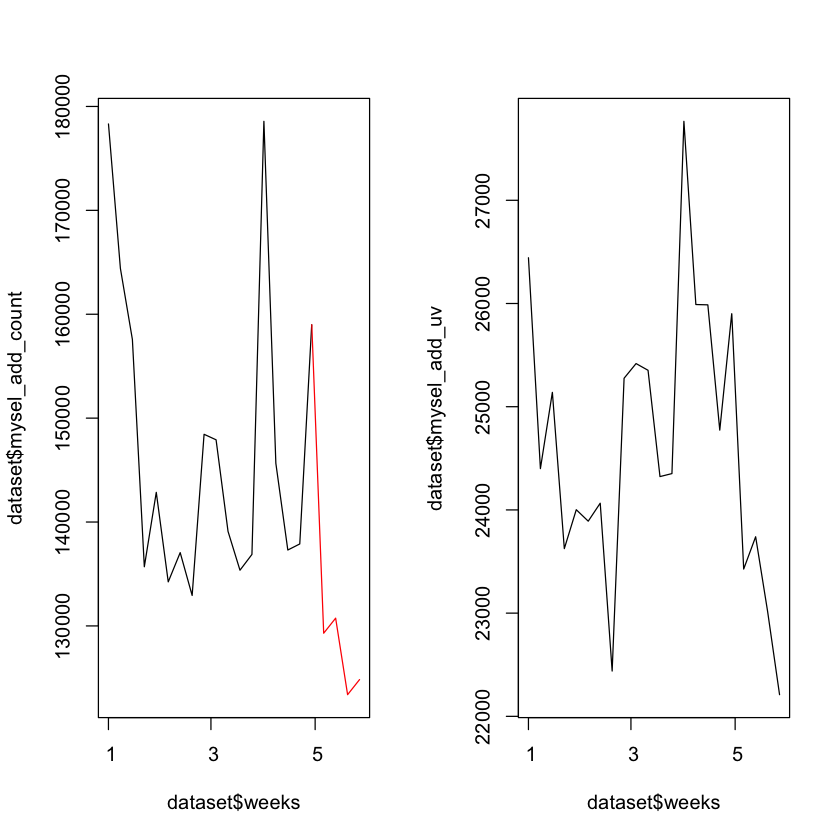

Posterior inference {CausalImpact}

                         Average            Cumulative       
Actual                   127066             508264           
Prediction (s.d.)        148801 (7991)      595204 (31963)   
95% CI                   [133167, 164337]   [532668, 657349] 
                                                             
Absolute effect (s.d.)   -21735 (7991)      -86940 (31963)   
95% CI                   [-37271, -6101]    [-149085, -24404]
                                                             
Relative effect (s.d.)   -15% (5.4%)        -15% (5.4%)      
95% CI                   [-25%, -4.1%]      [-25%, -4.1%]    

Posterior tail-area probability p:   0.00101
Posterior prob. of a causal effect:  99.8994%

For more details, type: summary(impact, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 127.07K. By contrast, in the absence of an intervention, we would have expec

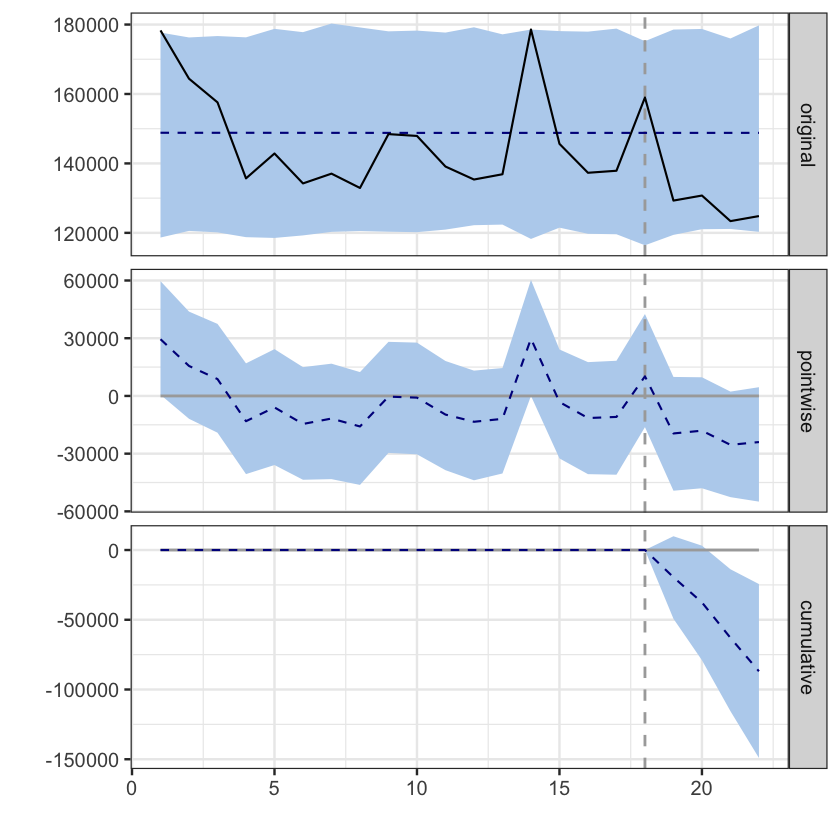

Posterior inference {CausalImpact}

                         Average            Cumulative      
Actual                   127066             508264          
Prediction (s.d.)        131594 (5226)      526375 (20904)  
95% CI                   [120660, 141435]   [482639, 565739]
                                                            
Absolute effect (s.d.)   -4528 (5226)       -18111 (20904)  
95% CI                   [-14369, 6406]     [-57475, 25625] 
                                                            
Relative effect (s.d.)   -3.4% (4%)         -3.4% (4%)      
95% CI                   [-11%, 4.9%]       [-11%, 4.9%]    

Posterior tail-area probability p:   0.19289
Posterior prob. of a causal effect:  81%

For more details, type: summary(impact, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 127.07K. In the absence of an intervention, we would have expected an average response of 1

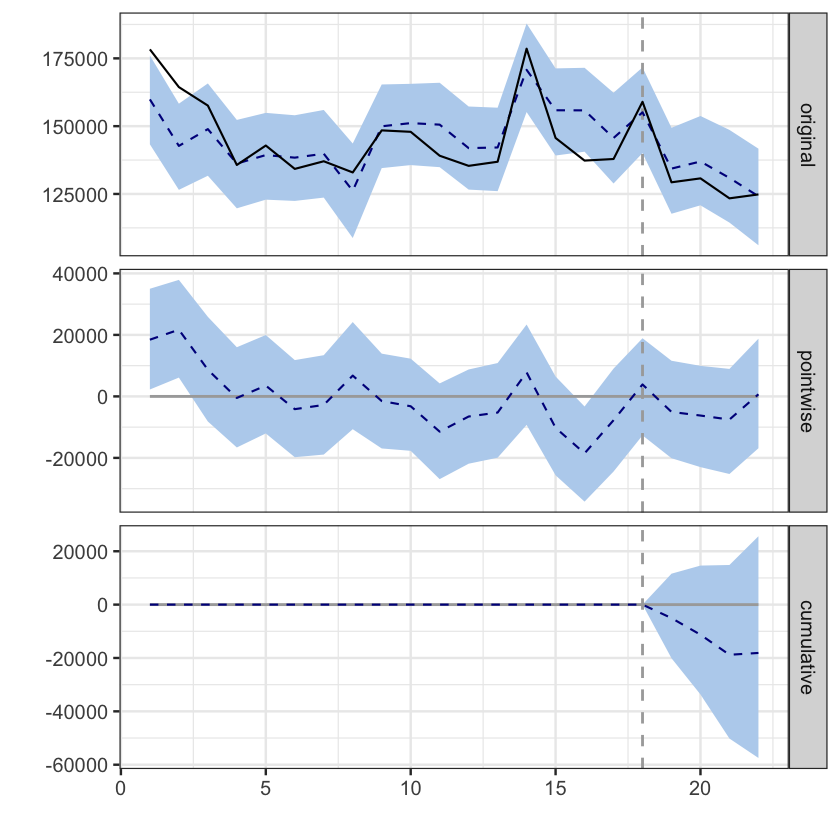

In [82]:
myselect<-read_csv('myselect.csv',col_names = c('weeks','mysel_add_count','mysel_add_uv'))
str(myselect)
#dataset<-myselect%>%mutate(wday=(wday(date)==4))%>%mutate(weeks=cumsum(wday))%>%group_by(weeks) %>% summarise(mysel_add_count=sum(mysel_add_count))
#ggplot(dataset,aes(weeks,mysel_add_count))+geom_line()
dataset<-myselect
col<-rep('black',length(dataset$weeks))
col[17:22]<-'red'
par(mfrow=c(1,2))
plot(dataset$weeks,dataset$mysel_add_count,type='n')
lines(dataset$weeks[1:18],dataset$mysel_add_count[1:18])
lines(dataset$weeks[18:22],dataset$mysel_add_count[18:22],col='red')
plot(dataset$weeks,dataset$mysel_add_uv,type='l')

pre.period <- c(1, 18)
post.period <- c(19, 22)


impact <- CausalImpact(as.data.frame(dataset$mysel_add_count), pre.period, post.period)
plot(impact)
summary(impact)
summary(impact, "report")

impact <- CausalImpact(cbind(dataset$mysel_add_count,dataset$mysel_add_uv), pre.period, post.period)
plot(impact)
summary(impact)
summary(impact, "report")

# Referrence
[1] [Using Causal Inference to Improve the Uber User Experience(2019)](https://eng.uber.com/causal-inference-at-uber/)  
[2] [Inferring causal impact using bayesian structurl time-series models(2015)](https://storage.googleapis.com/pub-tools-public-publication-data/pdf/41854.pdf)  
[3] [Predicting the Present with Bayesian Structural Time Series(2013)](https://storage.googleapis.com/pub-tools-public-publication-data/pdf/41335.pdf)  
[4] [An R package for causal inference using Bayesian structural time-series models](https://google.github.io/CausalImpact/CausalImpact.html)

# Appendix

In [ ]:
library(tidyverse)
Y.df <- read.csv('GDPC1.csv', header =TRUE)
names <- c('Date', 'GDP')
Y <- data.frame(Y.df[,2])
p = 2
T1 = nrow(Y)

regression_matrix  <- function(data,p,constant){
    nrow <- as.numeric(dim(data)[1])
    nvar <- as.numeric(dim(data)[2])
    
    Y1 <- as.matrix(data, ncol = nvar)
    X <- embed(Y1, p+1)
    X <- X[,(nvar+1):ncol(X)]
    if(constant == TRUE){
        X <-cbind(rep(1,(nrow-p)),X)
    }
    Y = matrix(Y1[(p+1):nrow(Y1),])
    nvar2 = ncol(X)
    return = list(Y=Y,X=X,nvar2=nvar2,nrow=nrow) 
}
################################################################
ar_companion_matrix <- function(beta){
    #check if beta is a matrix
    if (is.matrix(beta) == FALSE){
        stop('error: beta needs to be a matrix')
    }
    # dont include constant
    k = nrow(beta) - 1
    FF <- matrix(0, nrow = k, ncol = k)
    
    #insert identity matrix
    FF[2:k, 1:(k-1)] <- diag(1, nrow = k-1, ncol = k-1)
   
    temp <- t(beta[2:(k+1), 1:1])
    #state space companion form
    #Insert coeffcients along top row
    FF[1:1,1:k] <- temp
    return(FF)
}

In [ ]:
results = list()
results <- regression_matrix(Y, p, TRUE)
nrow <- results$nrow
nvar <- results$nvar
# Initialise Priors
B0 <- c(rep(0, nvar))
B <- as.matrix(B, nrow = 1, ncol = nvar)
sigma0 <- diag(1,nvar)
T0 = 1 # prior degrees of freedom
D0 = 0.1 # prior scale (theta0)
# initial value for variance
sigma2 = 1 
reps = 10
burn = 4000
horizon = 14
out = matrix(0, nrow = reps, ncol = nvar + 1)
colnames(out) <- c('constant', 'beta1','beta2', 'sigma')
out1 <- matrix(0, nrow = reps, ncol = horizon)


gibbs_sampler <- function(X,Y,B0,sigma0,sigma2,theta0,D0,reps,out,out1){
for(i in 1:reps){
    if (i %% 1000 == 0){
    print(sprintf("Interation: %d", i))
        }
    M = solve(solve(sigma0) + as.numeric(1/sigma2) * t(X) %*% X) %*%
        (solve(sigma0) %*% B0 + as.numeric(1/sigma2) * t(X) %*% Y)
    
    V = solve(solve(sigma0) + as.numeric(1/sigma2) * t(X) %*% X)
    
    chck = -1
    while(chck < 0){   # check for stability
        
        B <- M + t(rnorm(p+1) %*% chol(V))
        
        # Check : not stationary for 3 lags
        b = ar_companion_matrix(B)
        ee <- max(sapply(eigen(b)$values,abs))
        if( ee<=1){
            chck=1
        }
    }
    # compute residuals
    resids <- Y- X%*%B
    T2 = T0 + T1
    D1 = D0 + t(resids) %*% resids
    
    # keeps samples after burn period
    out[i,] <- t(matrix(c(t(B),sigma2)))
    
    
    #draw from Inverse Gamma
    z0 = rnorm(T1,1)
    z0z0 = t(z0) %*% z0
    sigma2 = D1/z0z0
    
    # keeps samples after burn period
    out[i,] <- t(matrix(c(t(B),sigma2)))
    
    # compute 2 year forecasts
    yhat = rep(0,horizon)
    end = as.numeric(length(Y))
    yhat[1:2] = Y[(end-1):end,]
    cfactor = sqrt(sigma2)
    X_mat = c(1,rep(0,p))
for(m in (p+1):horizon){
            for (lag in 1:p){
            #create X matrix with p lags
                X_mat[(lag+1)] = yhat[m-lag]
    }
            # Use X matrix to forecast yhat
            yhat[m] = X_mat %*% B + rnorm(1) * cfactor
    }
    
out1[i,] <- yhat
}
    return = list(out,out1)
    }
results1 <- gibbs_sampler(X,Y,B0,sigma0,sigma2,T0,D0,reps,out,out1)
# burn first 4000
coef <- results1[[1]][(burn+1):reps,]
forecasts <- results1[[2]][(burn+1):reps,]

In [ ]:
library(lubridate)
#install.packages('bsts')
library(bsts)
library(tidyverse)

### Load the data
data("AirPassengers")
Y <- window(AirPassengers, start=c(1949, 1), end=c(1959,12))
y <- log10(Y)

### Run the bsts model
ss <- AddLocalLinearTrend(list(), y)
ss <- AddSeasonal(ss, y, nseasons = 12)
bsts.model <- bsts(y, state.specification = ss, niter = 500, ping=0, seed=2016)

### Get a suggested number of burn-ins
burn <- SuggestBurn(0.1, bsts.model)

### Predict
p <- predict.bsts(bsts.model, horizon = 12, burn = burn, quantiles = c(.025, .975))

### Actual versus predicted
d2 <- data.frame(
    # fitted values and predictions
    c(10^as.numeric(-colMeans(bsts.model$one.step.prediction.errors[-(1:burn),])+y),  
    10^as.numeric(p$mean)),
    # actual data and dates 
    as.numeric(AirPassengers),
    as.Date(time(AirPassengers)))
names(d2) <- c("Fitted", "Actual", "Date")

### MAPE (mean absolute percentage error)
MAPE <- filter(d2, year(Date)>1959) %>% summarise(MAPE=mean(abs(Actual-Fitted)/Actual))

### 95% forecast credible interval
posterior.interval <- cbind.data.frame(
  10^as.numeric(p$interval[1,]),
  10^as.numeric(p$interval[2,]), 
  subset(d2, year(Date)>1959)$Date)
names(posterior.interval) <- c("LL", "UL", "Date")

### Join intervals to the forecast
d3 <- left_join(d2, posterior.interval, by="Date")

### Plot actual versus predicted with credible intervals for the holdout period
ggplot(data=d3, aes(x=Date)) +
  geom_line(aes(y=Actual, colour = "Actual"), size=1.2) +
  geom_line(aes(y=Fitted, colour = "Fitted"), size=1.2, linetype=2) +
  theme_bw() + theme(legend.title = element_blank()) + ylab("") + xlab("") +
  geom_vline(xintercept=as.numeric(as.Date("1959-12-01")), linetype=2) + 
  geom_ribbon(aes(ymin=LL, ymax=UL), fill="grey", alpha=0.5) +
  ggtitle(paste0("BSTS -- Holdout MAPE = ", round(100*MAPE,2), "%")) +
  theme(axis.text.x=element_text(angle = -90, hjust = 0))